<img src='./img/logo.png'><br>
* ref : https://www.kaggle.com/smid80/weatherww2

* ref : https://leedakyeong.tistory.com/entry/Python-%EB%82%A0%EC%94%A8-%EC%8B%9C%EA%B3%84%EC%97%B4-%EB%8D%B0%EC%9D%B4%ED%84%B0Kaggle%EB%A1%9C-ARIMA-%EC%A0%81%EC%9A%A9%ED%95%98%EA%B8%B0?category=854707

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

# import plotly.plotly as py
# from plotly.offline import init_notebook_mode, iplot # plotly offline mode
# init_notebook_mode(connected=True) 
# import plotly.graph_objs as go
plt.style.use('ggplot') 

import warnings        
warnings.filterwarnings("ignore") 


#-------------------- 주피터 셀 넓이 조절 ---------------------
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('max_colwidth', None)

sns.set()

In [2]:
# w1 = pd.read_csv("./datasets/Weather Station Locations.csv")
# w2 = pd.read_csv("./datasets/Summary of Weather.csv")

w2 = pd.read_csv("./datasets/Summary of Weather.csv", sep=',', 
                  header=0,  
                  usecols=['Date','MeanTemp','STA'],
                  index_col='Date', 
                  parse_dates=['Date'],  #dayfirst=True
                  dtype={'MeanTemp':float})

w2.head()

,STA,MeanTemp
Date,,
1942-07-01,10001,23.888889
1942-07-02,10001,25.555556
1942-07-03,10001,24.444444
1942-07-04,10001,24.444444
1942-07-05,10001,24.444444


In [3]:
w2['STA'].unique()

array([10001, 10002, 10101, 10102, 10502, 10505, 10701, 10703, 10704,
       10705, 10718, 10802, 10803, 10804, 10806, 10807, 11101, 11103,
       11501, 11601, 11604, 11606, 11610, 11615, 11701, 11704, 11801,
       11901, 11902, 12001, 12101, 12701, 12702, 12706, 12801, 13002,
       13005, 13007, 13013, 13201, 13601, 15027, 16101, 16201, 16202,
       16405, 16407, 16504, 20501, 20602, 21501, 22502, 22504, 22507,
       22508, 22509, 30001, 31001, 31101, 31302, 31401, 31501, 31701,
       32301, 32501, 32503, 32504, 32601, 32602, 32603, 32701, 32702,
       32801, 32803, 32805, 32812, 32815, 32904, 32906, 32907, 33003,
       33013, 33014, 33019, 33023, 33031, 33044, 33109, 33111, 33117,
       33121, 33123, 33205, 33206, 33303, 33305, 33307, 33401, 33405,
       33406, 33501, 34002, 34003, 34005, 34012, 34013, 34017, 34018,
       34022, 34101, 34104, 34105, 34109, 34111, 34113, 34123, 34139,
       34147, 34150, 40601, 41204, 41207, 42204, 42206, 42401, 43201,
       43302, 43305,

In [4]:
w2.groupby('STA').count().sort_values(by='MeanTemp').T

STA,33121,34101,43307,33123,42206,43302,44401,34105,34003,12706,43305,43201,42204,34017,82402,33111,34013,62701,34139,16101,34018,13013,34002,34005,34012,33307,41204,32603,15027,33019,42401,82404,33014,33406,41207,20602,34147,32812,33206,34150,33205,33013,61502,80425,34111,82506,11101,34022,80510,33003,10807,80504,82501,34123,33305,33044,32602,31302,30001,32504,80509,11103,33405,12702,50301,32301,80411,22509,11615,32815,34109,80412,32503,34113,10101,13201,40601,34104,13007,32906,10505,10704,32907,33401,32501,82503,31501,31101,31001,33501,81404,31401,33303,82403,12001,82405,11501,21501,10802,82502,32801,33117,33109,12101,32803,32702,61501,50304,50303,10806,10703,32904,10002,50403,50302,16201,33023,12801,12701,13005,81601,33031,50802,32805,13002,16202,10001,11902,31701,11801,50401,10718,60701,11606,32701,22507,10102,11701,32601,10705,16407,50801,81702,11901,10804,11704,13601,16504,20501,11604,10502,11601,16405,11610,10803,22504,22502,10701,22508
MeanTemp,13,31,46,47,50,61,61,61,69,83,91,92,99,105,152,156,166,179,196,204,220,235,246,256,258,263,275,276,295,295,296,305,314,320,321,333,348,349,369,376,379,383,397,410,413,415,427,429,429,445,445,457,465,474,485,502,510,513,522,530,535,569,576,604,610,613,625,626,629,630,646,648,651,660,663,669,682,713,720,720,737,742,751,752,754,759,761,765,767,774,779,785,792,796,818,818,836,836,838,848,868,868,874,876,883,884,884,884,884,887,900,905,935,974,988,989,996,996,1055,1078,1086,1121,1124,1135,1137,1141,1157,1157,1180,1188,1188,1215,1217,1218,1225,1259,1270,1289,1331,1332,1336,1358,1358,1360,1367,1471,1487,1492,1497,1514,1527,1604,1622,1631,1750,2118,2154,2185,2192


In [5]:
# df = w2[w2['STA']==31001].copy()
df = w2[w2['STA']==33401].copy()
df.shape
df.head()

,STA,MeanTemp
Date,,
1943-12-01,33401,18.888889
1943-12-02,33401,19.444444
1943-12-03,33401,21.111111
1943-12-04,33401,18.888889
1943-12-05,33401,16.666667


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 752 entries, 1943-12-01 to 1945-12-23
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   STA       752 non-null    int64  
 1   MeanTemp  752 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 17.6 KB


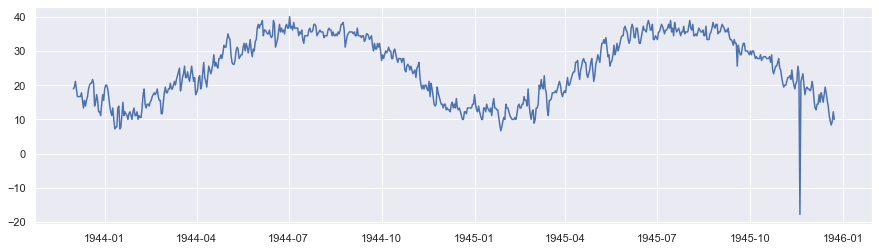

In [7]:
plt.figure(figsize=(15,4))
# df['Date'] = pd.to_datetime(df['Date'])
plt.plot(df.MeanTemp)
plt.show()

## 시계열 분해

<Figure size 432x288 with 0 Axes>

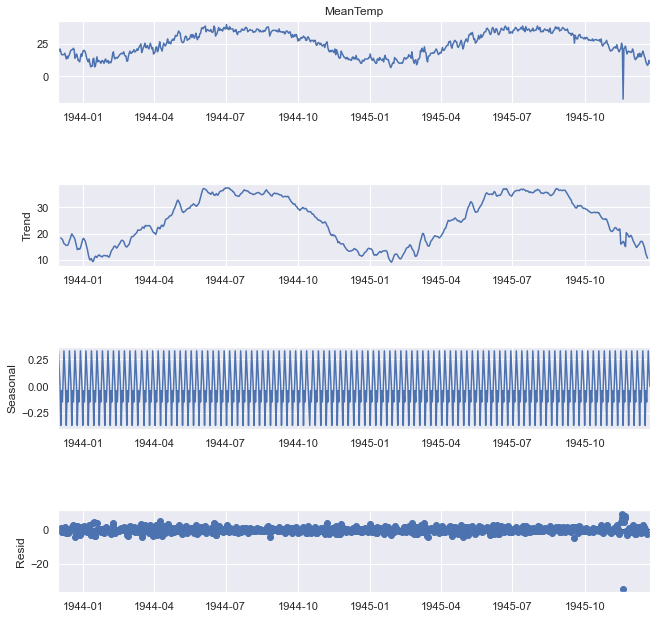

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
fig = plt.figure()  
result = seasonal_decompose(df['MeanTemp'], model='additive', freq=7)  #계절성 주기 기반
fig = result.plot()  
fig.set_size_inches(10, 10)

### 방법1) 정상성 확인 : ACF 그래프

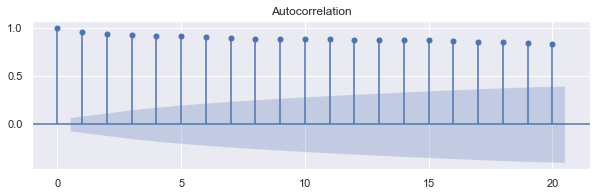

In [36]:
import statsmodels.api as sm

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['MeanTemp'], lags=20, ax=ax1)

### 방법2) 정상성 확인 : ADF 검정(Augmented Dickey-Fuller test)
* H0(귀무가설) : 자료에 단위근이 존재한다. 즉, 정상성을 만족하지 않는다. 
* H1(대립가설) : 자료가 정상성을 만족한다.

In [10]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['MeanTemp'])
print(result)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:', result[4])

(-1.0631906529027106, 0.7295256931442782, 20, 731, {'1%': -3.4393273074073045, '5%': -2.8655019247555154, '10%': -2.568879771109793}, 3436.8066506552086)
ADF Statistic: -1.063191
p-value: 0.729526
Critical Values: {'1%': -3.4393273074073045, '5%': -2.8655019247555154, '10%': -2.568879771109793}


* p-value > 0.05 : 귀무가설 채택. 즉, 해당 데이터는 정상성을 만족하지 못한다.
* p-value < 0.05 : 귀무가설 기각. 즉, 해당 데이터는 정상성을 만족한다.

### 1차 차분

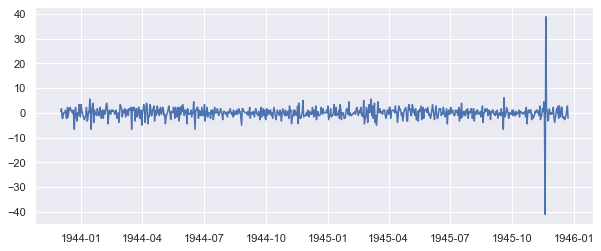

In [38]:
df_diff = df['MeanTemp'] - df['MeanTemp'].shift()
plt.figure(figsize=(10,4))
plt.plot(df_diff)
plt.show()
# 패턴x, 정상성

In [12]:
df_diff

Date
1943-12-01         NaN
1943-12-02    0.555556
1943-12-03    1.666667
1943-12-04   -2.222222
1943-12-05   -2.222222
                ...   
1945-12-19   -1.666667
1945-12-20   -1.111111
1945-12-21    1.111111
1945-12-22    2.777778
1945-12-23   -2.222222
Name: MeanTemp, Length: 752, dtype: float64

In [13]:
result = adfuller(df_diff[1:])
print(result)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:', result[4])

(-5.799824031691407, 4.659117645515944e-07, 19, 731, {'1%': -3.4393273074073045, '5%': -2.8655019247555154, '10%': -2.568879771109793}, 3426.9799375422604)
ADF Statistic: -5.799824
p-value: 0.000000
Critical Values: {'1%': -3.4393273074073045, '5%': -2.8655019247555154, '10%': -2.568879771109793}


* p-value: 0.000000
* p-value < 0.05 : 귀무가설 기각. 즉, 해당 데이터는 정상성을 만족한다.

##  차분한 데이터 사용해 ACF, PACF 그래프 그려 ARIMA(p,1,q)값 결정

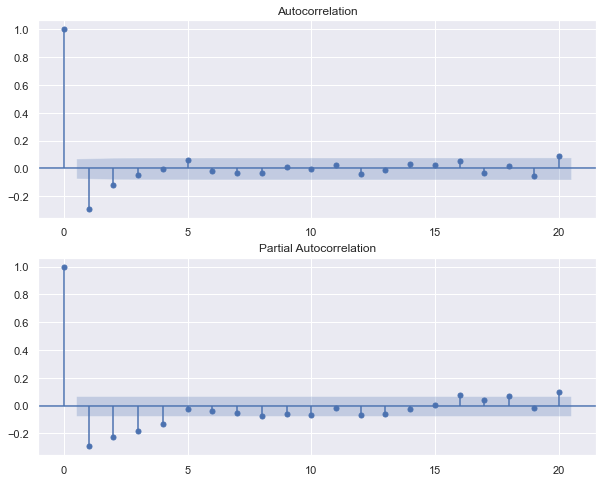

In [18]:
import statsmodels.api as sm
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_diff[1:], lags=20, ax=ax1) # 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_diff[1:], lags=20, ax=ax2)# , lags=40

* ACF와 PACF 모두 2차분 이후 0에 수렴              --> ARIMA(2,1,2) 결정
* ACF2차분 이후 0에 수렴, PACF 4차분 이후 0에 수렴  --> ARIMA(4,1,2) 결정

In [24]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import datetime

# fit model
model = ARIMA(df['MeanTemp'], order=(2,1,2))
model_fit = model.fit()  #disp=1



c:\it\pythonproject2\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\it\pythonproject2\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [43]:
from sklearn import metrics

def my_score(y_true, y_pred):
    r2 = round(metrics.r2_score(y_true, y_pred) * 100, 3)
    #     mae = round(metrics.mean_absolute_error(y_true, y_pred),3)
    corr = round(np.corrcoef(y_true, y_pred)[0, 1], 3)
    mape = round(metrics.mean_absolute_percentage_error(y_true, y_pred) * 100, 3)
    rmse = round(metrics.mean_squared_error(y_true, y_pred, squared=False), 3)
    print(
        'R2', r2,
        "Corr", corr,
        "RMSE", rmse,
        "MAPE", mape
    )

In [44]:
start_index = datetime(1944, 6, 25)
my_score(np.array(df[df.index>=start_index].MeanTemp),np.array(pred) )

NameError: name 'pred' is not defined

In [31]:
df.index.values[-1]

numpy.datetime64('1945-12-23T00:00:00.000000000')

In [39]:
# predict
start_index = datetime(1945, 12, 24)
end_index = datetime(1946, 3, 31)
#-----------------------------------------------------------------------------------  
#차분한 경우 반드시 typ='levels',  typ='linear'(default):차분한 값에 대한 결과
#----------------------------------------------------------------------------------- 주의주의주의
pred = model_fit.predict(start=79250, end=80000, typ='levels') 

# visualization
plt.figure(figsize=(15,4))
plt.plot(df.MeanTemp, label = "original")
plt.plot(pred, label = "predicted")
plt.legend()
plt.show()

c:\it\pythonproject2\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
c:\it\pythonproject2\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


ValueError: Length of passed values is 79249, index implies 751.